In [1]:
%pylab inline

import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from PIL import Image

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# Loading dan preprocessing dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
model = Sequential()

# Layer 1
model.add(Convolution2D(96, 11, 11, input_shape = (1,28,28), border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2), padding='same'))

# Layer 2
model.add(Convolution2D(256, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2), padding='same'))


# Layer 3
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, border_mode='same'))
model.add(Activation('relu'))

# Layer 4
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(1024, 3, 3, border_mode='same'))
model.add(Activation('relu'))

# Layer 5
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(1024, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
model.add(Flatten())
model.add(Dense(3072, init='glorot_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Layer 7
model.add(Dense(4096, init='glorot_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Layer 8
model.add(Dense(10, init='glorot_normal'))
model.add(Activation('softmax'))

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=True, validation_split=0.25)
score = model.evaluate(X_test, Y_test, verbose=True)
print("Test Score : %0.05f" % score [0])
print("Test Accuracy : %0.05f"% score [1])
print(history.history.keys())



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 15000 samples
Epoch 1/50





45000/45000 [==============================] - 53s 1ms/step - loss: 0.5468 - acc: 0.8128 - val_loss: 0.1412 - val_acc: 0.9643
Epoch 2/50
45000/45000 [==============================] - 36s 791us/step - loss: 0.1009 - acc: 0.9723 - val_loss: 0.0978 - val_acc: 0.9742
Epoch 3/50
45000/45000 [==============================] - 36s 792us/step - loss: 0.0764 - acc: 0.9791 - val_loss: 0.0758 - val_acc: 0.9794
Epoch 4/50
45000/45000 [==============================] - 36s 793us/step - loss: 0.0630 - acc: 0.9832 - val_loss: 0.1082 - val_acc: 0.9756
Epoch 5/50
45000/45000 [==============================] - 36s 791us/step - loss: 0.0566 - acc: 0.9853 - val_loss: 0.0758 - val_acc: 0.9820
Epoch 6/50
45000/45000 [==============================] - 36s 792us/step - loss: 0.0511 - acc: 0.9866 - val_loss: 0.0722 - val_acc: 0.9825
Epoch 7/50
450

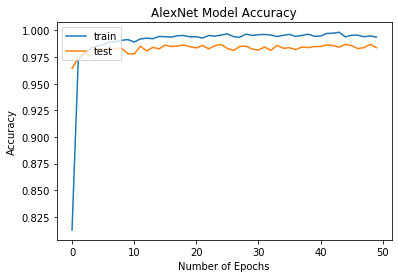

In [5]:
# Visualisasi Akurasi
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("AlexNet Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()